# Principal Component Analysis

-----
-----

## GOAL: Figure out which handwritten digits are most differentiated with PCA.

**Imagine you are working on an image recognition service for a postal service. It would be very useful to be able to read in the digits automatically, even if they are handwritten. (Quick note, this is very much how modern postal services work for a long time now and its actually more accurate than a human). The manager of the postal service wants to know which handwritten numbers are the hardest to tell apart, so he can focus on getting more labeled examples of that data. You will have a dataset of hand written digits (a very famous data set) and you will perform PCA to get better insight into which numbers are easily separable from the rest.**

-----
-----

# Data

    Background:

    E. Alpaydin, Fevzi. Alimoglu
    Department of Computer Engineering
    Bogazici University, 80815 Istanbul Turkey
    alpaydin '@' boun.edu.tr


#### Data Set Information from Original Authors:

We create a digit database by collecting 250 samples from 44 writers. The samples written by 30 writers are used for training, cross-validation and writer dependent testing, and the digits written by the other 14 are used for writer independent testing. This database is also available in the UNIPEN format.

We use a WACOM PL-100V pressure sensitive tablet with an integrated LCD display and a cordless stylus. The input and display areas are located in the same place. Attached to the serial port of an Intel 486 based PC, it allows us to collect handwriting samples. The tablet sends $x$ and $y$ tablet coordinates and pressure level values of the pen at fixed time intervals (sampling rate) of 100 miliseconds.

These writers are asked to write 250 digits in random order inside boxes of 500 by 500 tablet pixel resolution. Subject are monitored only during the first entry screens. Each screen contains five boxes with the digits to be written displayed above. Subjects are told to write only inside these boxes. If they make a mistake or are unhappy with their writing, they are instructed to clear the content of a box by using an on-screen button. The first ten digits are ignored because most writers are not familiar with this type of input devices, but subjects are not aware of this.

SOURCE: https://archive.ics.uci.edu/ml/datasets/Pen-Based+Recognition+of+Handwritten+Digits

## 📦 Data Setup & Library Imports

Let's begin by importing all required libraries and loading the dataset.

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import plotly.express as px

import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

In [21]:
digits = pd.read_csv('DATA/digits.csv')

In [22]:
## 📊 Data Exploration & Visualization

digits.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,number_label
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


## 🔍 Exploratory Data Analysis (EDA) Overview

The Exploratory Data Analysis (EDA) section helps you understand the structure and characteristics of the handwritten digits dataset before applying dimensionality reduction techniques like PCA. Through EDA, you can identify patterns, detect anomalies, and gain insights into the distribution of the data.

**In this section, we will:**
- Visualize the distribution of digit classes.
- Explore sample images to understand the pixel data.
- Analyze feature distributions and correlations.

### Creating the Pixel Features DataFrame

To prepare the data for PCA, we create a new DataFrame called `pixels` by dropping the `number_label` column. This ensures that only the pixel feature values are included for dimensionality reduction.

In [23]:
pixels = digits.drop('number_label',axis=1)
pixels.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


### Displaying an Image

To visualize a single digit, we first grab its pixel representation by selecting the first row of the `pixels` DataFrame. This row contains the pixel values for one image and can be reshaped into its original 2D form for display.

In [24]:
single_image = pixels.iloc[0]
single_image.head()

pixel_0_0     0.0
pixel_0_1     0.0
pixel_0_2     5.0
pixel_0_3    13.0
pixel_0_4     9.0
Name: 0, dtype: float64

#### Converting the Series to a NumPy Array

To work with the pixel values numerically, we convert the single row (a pandas Series) into a NumPy array. This allows us to reshape and visualize the image data easily.

In [25]:
single_image.to_numpy()

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

#### Reshaping the Array

The 1D NumPy array of pixel values is reshaped into an (8, 8) array to match the original dimensions of the image for visualization.

In [26]:
print(single_image.to_numpy().shape)
print(single_image.to_numpy().reshape(8,8).shape)

(64,)
(8, 8)


#### Visualizing the Image

We use Matplotlib to display the reshaped (8, 8) array as an image. The choice of color map (`cmap`) affects the appearance but not the underlying pixel values.

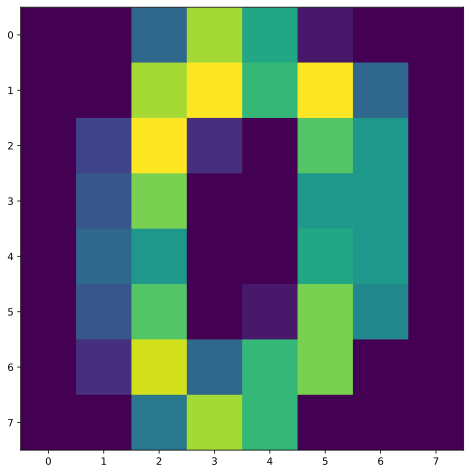

In [27]:
plt.figure(figsize=(8,8))
plt.imshow(single_image.to_numpy().reshape(8,8))
plt.savefig('visualisations/single_image.svg')

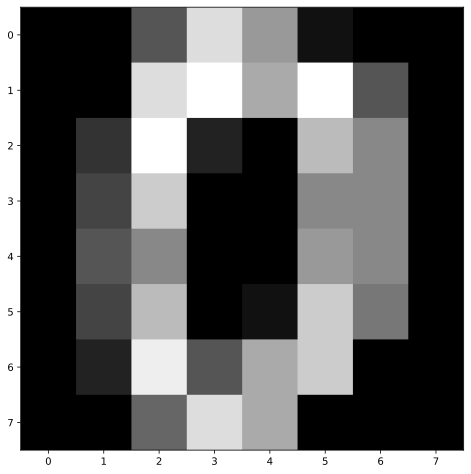

In [28]:
plt.figure(figsize=(8,8))
plt.imshow(single_image.to_numpy().reshape(8,8),cmap='gray')

<Axes: >

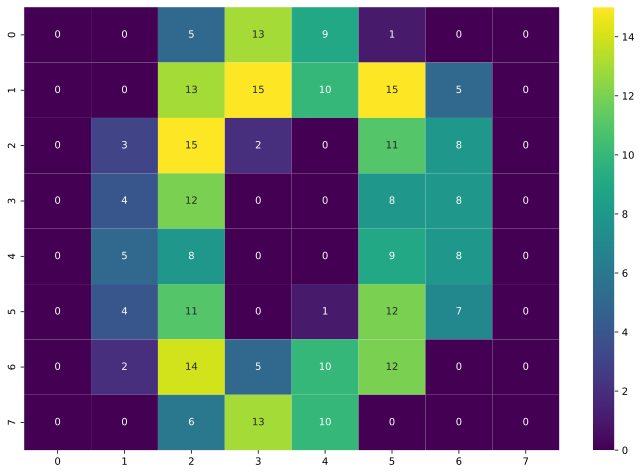

In [29]:
plt.figure(figsize=(12,8))
sns.heatmap(single_image.to_numpy().reshape(8,8),annot=True,cmap='viridis')

------

## Principal Component Analysis (PCA)

In this section, we will apply Principal Component Analysis (PCA) to the pixel data. PCA is a powerful technique for reducing the dimensionality of high-dimensional datasets while preserving as much variance as possible. By transforming the original features into a smaller set of principal components, we can simplify the data, visualize complex patterns, and potentially improve downstream analysis or modeling.

We will:
- Fit PCA to the pixel data
- Analyze explained variance to determine the number of components to keep
- Visualize the data in the space of the principal components
- Interpret the meaning and usefulness of these components

### Scaling Data

Before applying PCA, we scale the pixel features to ensure that each feature contributes equally to the analysis. Standardization (zero mean, unit variance) is typically used, as PCA is sensitive to the relative scaling of the input features.

To prepare the pixel features for PCA, we use Scikit-Learn's `StandardScaler` to standardize the data. This ensures that each pixel feature has zero mean and unit variance, preventing features with larger scales from dominating the principal components.

In [30]:
scaler = StandardScaler()
scaled_pixels = scaler.fit_transform(pixels)
scaled_pixels

array([[ 0.        , -0.33501649, -0.04308102, ..., -1.14664746,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  0.54856067,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  1.56568555,
         1.6951369 , -0.19600752],
       ...,
       [ 0.        , -0.33501649, -0.88456568, ..., -0.12952258,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -0.67419451, ...,  0.8876023 ,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649,  1.00877481, ...,  0.8876023 ,
        -0.26113572, -0.19600752]])

### Applying PCA

We perform Principal Component Analysis (PCA) on the scaled pixel dataset, reducing it to 2 principal components. This transformation projects the high-dimensional data into a two-dimensional space, making it easier to visualize and interpret the main patterns captured by the principal components.

In [31]:
pca_model = PCA(n_components=2)
pca_pixels = pca_model.fit_transform(scaled_pixels)

### Explained Variance by Two Principal Components

To assess the effectiveness of dimensionality reduction, we calculate the proportion of total variance in the data that is explained by the first two principal components. This helps us understand how much of the original information is retained when projecting the data into two dimensions.

In [32]:
np.sum(pca_model.explained_variance_ratio_)

0.2159497050083282

A ratio of 0.216 (or about 21.6%) means that the first two principal components together explain only about one-fifth of the total variance in the dataset.

This is typical for high-dimensional image data, where much of the variance is spread across many components. While the 2D PCA projection is useful for visualization and exploring broad patterns, it does not capture the majority of the information in the original data. For tasks requiring more comprehensive data representation, we can use additional principal components to retain more variance.

### Creating a DataFrame for Principal Components

To facilitate plotting and further analysis, we convert the principal component scores into a new DataFrame. Each column corresponds to a principal component (e.g., `PC1`, `PC2`), and each row represents an image in the reduced PCA space.

In [33]:
df_pca = pd.DataFrame(pca_pixels,columns=['PC1','PC2'])
df_pca['number_label'] = digits['number_label'].values
print(df_pca.shape)
df_pca.head()

(1797, 3)


,PC1,PC2,number_label
0,-1.914214,-0.954502,0
1,-0.588980,0.924636,1
2,-1.302039,-0.317189,2
3,3.020770,-0.868772,3
4,-4.528949,-1.093480,4


### Scatterplot of Digits in 2D PCA Space

We visualize the digits in the two-dimensional PCA space by creating a scatterplot. Each point represents an image, and points are colored according to their original `number_label` value. This allows us to observe how well PCA separates different digit classes in two dimensions.

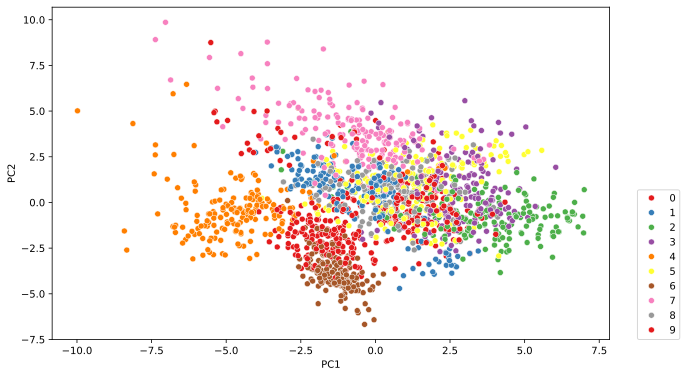

In [34]:
plt.figure(figsize=(10,6),dpi=150)
sns.scatterplot(data=df_pca,x='PC1',y='PC2',hue='number_label',palette='Set1',legend='full')
plt.legend(loc=(1.05,0))
plt.savefig('visualisations/pca_scatter.svg')

### Most Distinct Digits in PCA Space

By examining the scatterplot of digits in the 2D PCA space, we can identify which digit labels form the most separated and distinct clusters. In this case, digits labeled as **4** appear as the most clearly separated group, indicating that their pixel patterns are quite unique compared to other digits. Digits **2**, **6**, and **9** also show relatively distinct clusters, suggesting that PCA effectively captures their unique characteristics in the first two components.

### Density (KDE) Plot by Digit Class

This plot shows the density of data points in the 2D PCA space for each digit class, highlighting regions where certain digits cluster.

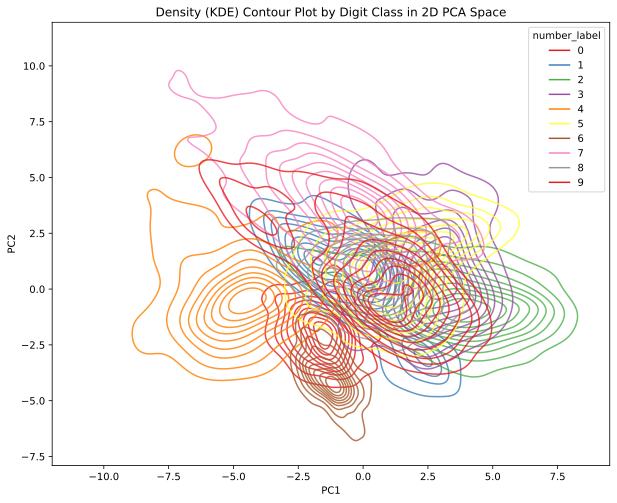

In [35]:
plt.figure(figsize=(10,8))
sns.kdeplot(
    data=df_pca,
    x='PC1', y='PC2',
    hue='number_label',
    palette='Set1',
    fill=False, 
    common_norm=False,
    alpha=0.8
)
plt.title('Density (KDE) Contour Plot by Digit Class in 2D PCA Space')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.savefig('visualisations/pca_2d_kde_contour.svg')
plt.show()

-----------

## Visualizing PCA in 3Ds

As a bonus, we will create an interactive 3D scatter plot using the first three principal components from PCA. This approach enables dynamic exploration of the data structure in three dimensions, making it easier to observe patterns and separations between digit classes.

**Process Overview:**
1. **Perform PCA** on the scaled pixel data, extracting three principal components.
2. **Create a new DataFrame** containing these three components along with the original digit labels.
3. **Use Plotly’s `scatter_3d` function** to plot the data in 3D, coloring each point by its digit label.
4. **Interact with the plot** directly in the notebook—rotate, zoom, and hover to explore the relationships between points and clusters.

Plotly is especially useful for this task because it provides smooth, interactive graphics right inside Jupyter Notebook, making it easy to analyze complex, high-dimensional data.

In [36]:
pca_model = PCA(n_components=3)
pca_pixels = pca_model.fit_transform(scaled_pixels)

df_3pca = pd.DataFrame(pca_pixels,columns=['PC1','PC2','PC3'])
df_3pca['number_label'] = df_pca['number_label']


In [37]:
print(df_3pca.shape)
df_3pca.head()

(1797, 4)


,PC1,PC2,PC3,number_label
0,-1.914214,-0.954502,-3.946035,0
1,-0.588980,0.924636,3.924755,1
2,-1.302039,-0.317189,3.023333,2
3,3.020770,-0.868772,-0.801744,3
4,-4.528949,-1.093480,0.973121,4


### Comparing Explained Variance: 2 vs 3 Principal Components

Previously, the first two principal components explained about 21.6% of the total variance in the dataset. By increasing to three components, the cumulative explained variance rises to 30%.

This comparison shows that while adding a third component increases the amount of information retained, the overall variance captured by just a few components remains limited for high-dimensional image data. Nonetheless, each additional component provides a more complete representation, making 3D visualizations more informative than 2D, but still not fully capturing all the complexity of the original data.

In [38]:
np.sum(pca_model.explained_variance_ratio_)

0.30039385393457363

### Interactive 3D PCA Plot with Plotly

The plot below displays the digit images projected into the space of the first three principal components. Each point represents an image, and points are colored according to their original digit label. This interactive visualization allows you to rotate, zoom, and hover to explore the separation and clustering of different digit classes in three dimensions.

In [39]:
fig = px.scatter_3d(
    df_3pca,
    x='PC1', y='PC2', z='PC3',
    color='number_label',
    title='Digits in 3D PCA Space',
    labels={'number_label': 'Digit Label'},
    opacity=0.7,
    width=1200,    
    height=800    
)
fig.show()

## Conclusion

In this project, we applied Principal Component Analysis (PCA) to a dataset of handwritten digits to reduce its dimensionality and visualize its structure. By projecting the high-dimensional pixel data into two and three principal components, we were able to explore the main patterns and separations among digit classes.

Key takeaways:
- The first two or three principal components capture only a portion of the total variance, which is typical for complex image data.
- Despite this, PCA enables effective visualization, revealing which digit classes are most distinct and how they cluster in reduced dimensions.
- PCA is a valuable tool for exploratory data analysis, noise reduction, and as a preprocessing step for other machine learning algorithms.

This analysis demonstrates the power and limitations of PCA for high-dimensional data, and sets the stage for further exploration or modeling using the reduced feature set.